In [258]:
import numpy as np
import sympy as sym
import numpy.linalg as LA
from sympy import *
from sympy import oo, gamma
from IPython.display import display
from scipy import special
from matplotlib import pyplot as plt
import matplotlib
init_printing(use_latex='mathjax')
x, y, z, t= symbols('x y z t')
r,theta, phi = symbols('r  theta  phi')
f, g, h = symbols('f g h', cls=Function)

In [203]:
def newtonmethod(u,J,f):
    u=np.array(u)
    result=f(u)
    while LA.norm(result)>0.000001:
        Jac=J(u)
        if(LA.det(Jac)!=0):
            ainv = LA.inv(Jac)
        else:
            ainv = LA.pinv(Jac) 
        
        Rhs=np.add(-ainv@result, u)
        u=Rhs
        result=f(u)
        print(u)
    return u
    

In [213]:
def jac1(u):
    b=symbols('b')
    c=symbols('c')
    u1=u[0]
    u2=u[1]
    row1=[1-2*u1-b*u2,-b*u1]
    row2=[c*u2,1-2*u2+c*u1]
    A=Matrix([row1,row2])
    return A


In [189]:
def jac2(u):
    u1=float(u[0])
    u2=float(u[1])
    row1=[1+6*u1**2,-2*u2]
    row2=[-2*u2,3-2*u1]
    U=np.array([row1,row2])
    return U
def func2(u):
    lamda=1
    u1=float(u[0])
    u2=float(u[1])
    row1=[u1+(2*u1**3)-(u2**2)-(2*lamda)]
    row2=[3*u2-2*u1*u2-lamda]
    U=np.array([row1,row2])
    return U


In [272]:
def jac3(u):
    c=symbols('c')
    x=u[0]
    y=u[1]
    z=u[2]
    row1=[0,-1,1]
    row2=[1,1,0]
    row3=[z,0,x-c]
    A=Matrix([row1,row2,row3])
    return A

In [224]:
 b=symbols('b')
c=symbols('c')
point1=jac1([0,0])
point2=jac1([1/(2*(-1-b*c)),1/(2*(-1-b*c))])
point3=jac1([0,1])
point4=jac1([1-b,1])
display("Point 1")
display(point1.eigenvals())
display("Point 2")
display(point2.eigenvals())
display("Point 3")
display(point3.eigenvals())
display("Point 4")
display(simplify(point4.eigenvals()))

'Point 1'

{1: 2}

'Point 2'

⎧b⋅c + 2     2⋅b⋅c + b - c + 4   ⎫
⎨───────: 1, ─────────────────: 1⎬
⎩b⋅c + 1         2⋅b⋅c + 2       ⎭

'Point 3'

{-1: 1, 1 - b: 1}

'Point 4'

⎧                   ___________________________________________               
⎪                  ╱  2  2      2      2        2            2                
⎨  b⋅c   b   c   ╲╱  b ⋅c  + 6⋅b ⋅c + b  - 2⋅b⋅c  - 6⋅b⋅c + c             b⋅c 
⎪- ─── + ─ + ─ - ────────────────────────────────────────────── - 1: 1, - ─── 
⎩   2    2   2                         2                                   2  

             ___________________________________________       ⎫
            ╱  2  2      2      2        2            2        ⎪
  b   c   ╲╱  b ⋅c  + 6⋅b ⋅c + b  - 2⋅b⋅c  - 6⋅b⋅c + c         ⎬
+ ─ + ─ + ────────────────────────────────────────────── - 1: 1⎪
  2   2                         2                              ⎭

In [204]:
u=[[0.8],[0.8]]
newtonmethod(u,jac2,func2)

[[1.02542694]
 [0.97191651]]
[[1.00182721]
 [1.00524677]]
[[0.99998443]
 [0.99994934]]
[[1.]
 [1.]]


array([[1.],
       [1.]])

In [205]:
u=[[0.8],[1.1]]
newtonmethod(u,jac2,func2)

[[1.18863636]
 [1.325     ]]
[[1.2150449 ]
 [1.71822029]]
[[1.18974413]
 [1.60210402]]
[[1.1841877 ]
 [1.58288066]]
[[1.18399861]
 [1.58227118]]


array([[1.18399861],
       [1.58227118]])

In [206]:
u=[[5],[5]]
newtonmethod(u,jac2,func2)


[[3.30942092]
 [2.27225583]]
[[2.20172885]
 [1.11469904]]
[[1.47674645]
 [0.43911147]]
[[ -3.63382879]
 [-75.00411488]]
[[ -1.01057735]
 [-38.22773611]]
[[  0.26121831]
 [-19.16605706]]
[[ 0.90535597]
 [-9.56228146]]
[[ 1.26311795]
 [-4.91221732]]
[[ 1.51245234]
 [-3.05968608]]
[[ 1.66388096]
 [-2.9453078 ]]
[[ 1.66728731]
 [-2.98977524]]
[[ 1.66725879]
 [-2.9893796 ]]


array([[ 1.66725879],
       [-2.9893796 ]])

In [201]:
u=np.array([[1.667],[-2.9893]])

print(func2(u))

[[-0.00409856]
 [-0.0015738 ]]


In [299]:
c=symbols('c')
x1=(c+sqrt((c**2)-4))/2
y1=-x1
z1=x1
x2=(c-sqrt((c**2)-4))/2
y2=-x2
z2=x2
bifur1=jac3([x1,y1,z1])
bifur2=jac3([x2,y2,z2])
branch1=bifur1.eigenvals()
branch2=bifur2.eigenvals()
e1, values = branch1.keys(), branch1.values()
e2, values = branch2.keys(), branch2.values()
e1=list(e1)
e2=list(e2)

0.7429341358783228

In [309]:
def addPoint(scat, new_point, c='k'):
    old_off = scat.get_offsets()
    new_off = np.concatenate([old_off,np.array(new_point, ndmin=2)])
    old_c = scat.get_facecolors()
    new_c = np.concatenate([old_c, np.array(matplotlib.colors.to_rgba(c), ndmin=2)])

    scat.set_offsets(new_off)
    scat.set_facecolors(new_c)

    scat.axes.figure.canvas.draw_idle()

(-10.0, 10.0)

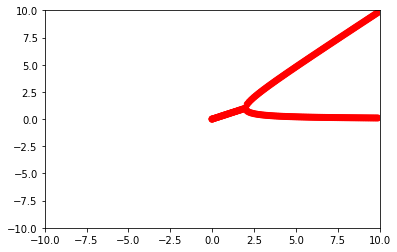

In [317]:
fig, ax = plt.subplots()
scat = ax.scatter([0,0,0],[0,0,0],cmap=matplotlib.cm.spring, c=[0,2,1])
fig.canvas.draw()  # if running all the code in the same cell, this is required for it to work, not sure why
C=np.arange(0,10,0.1)
color1='b'
color2='b'
for param in C:
    b1x=float(re(x1.subs(c,param)))
    b2x=float(re(x2.subs(c,param)))
    for e in e1:
        if(float(re(e.subs(c,0)))>0):
            color1='r'
    for e in e2:
        if(float(re(e.subs(c,0)))>0):
            color2='r'
    addPoint(scat, [param,b1x], color1)    
    addPoint(scat, [param,b2x], color2)  
    color1='b'
    color2='b'
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)